<img src="http://oproject.org/tiki-download_file.php?fileId=8&display&x=450&y=128">
<img src="http://gfif.udea.edu.co/root/tmva/img/tmva_logo.gif">

## Required header files

In [1]:
#include <iostream>
#include "TChain.h"
#include "TFile.h"
#include "TTree.h"
#include "TString.h"
#include "TSystem.h"
#include "TROOT.h"

#include "TMVA/Factory.h"
#include "TMVA/Tools.h"
#include "TMVA/DataLoader.h"

## Declare Factory and DataLoader

In [2]:
TMVA::Tools::Instance();

TString outfileName( "TMVAOutputDL.root" );
TFile* outputFile = TFile::Open( outfileName, "RECREATE" );

TMVA::Factory *factory = new TMVA::Factory( "TMVAClassification", outputFile,                                       "!V:ROC:!Correlations:!Silent:Color:!DrawProgressBar:AnalysisType=Classification" );
   
TMVA::DataLoader *loader1=new TMVA::DataLoader("mymc-dataset1");
TMVA::DataLoader *loader2=new TMVA::DataLoader("mymc-dataset2");
TFile *input = TFile::Open( "MyMCdataset.root");                

--- Factory                  : You are running ROOT Version: 6.05/03, Sep 14, 2015
--- Factory                  : 
--- Factory                  : _/_/_/_/_/ _|      _|  _|      _|    _|_|   
--- Factory                  :    _/      _|_|  _|_|  _|      _|  _|    _| 
--- Factory                  :   _/       _|  _|  _|  _|      _|  _|_|_|_| 
--- Factory                  :  _/        _|      _|    _|  _|    _|    _| 
--- Factory                  : _/         _|      _|      _|      _|    _| 
--- Factory                  : 
--- Factory                  : ___________TMVA Version 5.0.0 alpha, Oct 30, 2015
--- Factory                  : 


## Adding variables to DataLoader

In [3]:
//adding variables to dataset 1
loader1->AddVariable( "var0", 'F' );
loader1->AddVariable( "var1", 'F' );
loader1->AddVariable( "var2", 'F' );

//adding variables to dataset 2
loader2->AddVariable( "var0", 'F' );
loader2->AddVariable( "var1", 'F' );
loader2->AddVariable( "var2", 'F' );
loader2->AddVariable( "var3 := var0-var1", 'F' );
loader2->AddVariable( "var4 := var0*var2", 'F' );
loader2->AddVariable( "var5 := var1+var2", 'F' );

## Setting up dataset from Trees

In [4]:
std::cout << "--- TMVAClassification       : Using input file: " << input->GetName() << std::endl;
   
// --- Register the training and test trees

TTree *tsignal     = (TTree*)input->Get("MyMCSig");
TTree *tbackground = (TTree*)input->Get("MyMCBkg");
   
Double_t signalWeight     = 1.0;
Double_t backgroundWeight = 1.0;

TCut mycuts = "";
TCut mycutb = "";
   
loader1->AddSignalTree    ( tsignal,     signalWeight     );
loader1->AddBackgroundTree( tbackground, backgroundWeight );       
loader1->fSignalWeight=signalWeight;
loader1->fBackgroundWeight=backgroundWeight;
loader1->fTreeS=tsignal;
loader1->fTreeB=tbackground;
loader1->PrepareTrainingAndTestTree( mycuts, mycutb,  "nTrain_Signal=3000:nTrain_Background=3000:nTest_Signal=1449:nTest_Background=1449:SplitMode=Random:NormMode=NumEvents:!V" ); 


loader2->AddSignalTree    ( tsignal,     signalWeight     );
loader2->AddBackgroundTree( tbackground, backgroundWeight );       
loader2->fSignalWeight=signalWeight;
loader2->fBackgroundWeight=backgroundWeight;
loader2->fTreeS=tsignal;
loader2->fTreeB=tbackground;
loader2->PrepareTrainingAndTestTree( mycuts, mycutb,  "nTrain_Signal=3000:nTrain_Background=3000:nTest_Signal=1449:nTest_Background=1449:SplitMode=Random:NormMode=NumEvents:!V" );   


--- TMVAClassification       : Using input file: MyMCdataset.root
--- DataSetInfo              : Dataset[mymc-dataset1] : Added class "Signal"	 with internal class number 0
--- mymc-dataset1            : Add Tree MyMCSig of type Signal with 5449 events
--- DataSetInfo              : Dataset[mymc-dataset1] : Added class "Background"	 with internal class number 1
--- mymc-dataset1            : Add Tree MyMCBkg of type Background with 5449 events
--- mymc-dataset1            : Preparing trees for training and testing...
--- DataSetInfo              : Dataset[mymc-dataset2] : Added class "Signal"	 with internal class number 0
--- mymc-dataset2            : Add Tree MyMCSig of type Signal with 5449 events
--- DataSetInfo              : Dataset[mymc-dataset2] : Added class "Background"	 with internal class number 1
--- mymc-dataset2            : Add Tree MyMCBkg of type Background with 5449 events
--- mymc-dataset2            : Preparing trees for training and testing...


// TMVA ANN: MLP (recommended ANN) -- all ANNs in TMVA are Multilayer Perceptrons
factory->BookMethod( loader2,TMVA::Types::kMLP, "MLP", "!V:NeuronType=tanh:VarTransform=N:NCycles=50:HiddenLayers=N+5:TestRate=5:!UseRegulator" );## Booking Methods using different DataLoaders

In [5]:
// TMVA ANN: MLP Multilayer Perceptrons
factory->BookMethod(loader1,TMVA::Types::kMLP, "MLP", "!V:NeuronType=tanh:VarTransform=N:NCycles=150:HiddenLayers=N+5:TestRate=5:!UseRegulator" );

//Boosted Decision Trees
factory->BookMethod(loader2,TMVA::Types::kBDT, "BDT","!V:NTrees=5:MinNodeSize=2.5%:MaxDepth=2:BoostType=AdaBoost:AdaBoostBeta=0.5:UseBaggedBoost:BaggedSampleFraction=0.5:SeparationType=GiniIndex:nCuts=20" );

--- Factory                  : Booking method: MLP DataSet Name: mymc-dataset1
--- MLP                      : Dataset[mymc-dataset1] : Create Transformation "N" with events from all classes.
--- Norm                     : Transformation, Variable selection : 
--- Norm                     : Input : variable 'var0' (index=0).   <---> Output : variable 'var0' (index=0).
--- Norm                     : Input : variable 'var1' (index=1).   <---> Output : variable 'var1' (index=1).
--- Norm                     : Input : variable 'var2' (index=2).   <---> Output : variable 'var2' (index=2).
--- MLP                      : Building Network
--- MLP                      : Initializing weights
--- Factory                  : Booking method: BDT DataSet Name: mymc-dataset2
--- DataSetFactory           : Dataset[mymc-dataset2] : Splitmode is: "RANDOM" the mixmode is: "SAMEASSPLITMODE"
--- DataSetFactory           : Dataset[mymc-dataset2] : Create training and testing trees -- looping over class "Signa

## Training the Methods

In [6]:
factory->TrainAllMethods();

--- Factory                  :  
--- Factory                  : Train all methods for Classification ...
--- DataSetFactory           : Dataset[mymc-dataset1] : Splitmode is: "RANDOM" the mixmode is: "SAMEASSPLITMODE"
--- DataSetFactory           : Dataset[mymc-dataset1] : Create training and testing trees -- looping over class "Signal" ...
--- DataSetFactory           : Dataset[mymc-dataset1] : Weight expression for class 'Signal': ""
--- DataSetFactory           : Dataset[mymc-dataset1] : Create training and testing trees -- looping over class "Background" ...
--- DataSetFactory           : Dataset[mymc-dataset1] : Weight expression for class 'Background': ""
--- DataSetFactory           : Dataset[mymc-dataset1] : Number of events in input trees (after possible flattening of arrays):
--- DataSetFactory           : Dataset[mymc-dataset1] :     Signal          -- number of events       : 5449   / sum of weights: 5449 
--- DataSetFactory           : Dataset[mymc-dataset1] :     Backgrou

## Testing and Evaluating the data

In [7]:
factory->TestAllMethods();

factory->EvaluateAllMethods();    

// Save the output
outputFile->Close();

std::cout << "==> TMVAClassification is done!" << std::endl;

delete factory;
delete loader1;
delete loader2;

--- Factory                  : Test all methods...
--- Factory                  : Test method: MLP for Classification performance
--- MLP                      : Dataset[mymc-dataset1] : Evaluation of MLP on testing sample (2898 events)
--- MLP                      : Dataset[mymc-dataset1] : Elapsed time for evaluation of 2898 events: 0.00825 sec       
--- Factory                  : Test method: BDT for Classification performance
--- BDT                      : Dataset[mymc-dataset2] : Evaluation of BDT on testing sample (2898 events)
--- BDT                      : Dataset[mymc-dataset2] : Elapsed time for evaluation of 2898 events: 0.00275 sec       
--- Factory                  : Evaluate all methods...
--- Factory                  : Evaluate classifier: MLP
--- TFHandler_MLP            : -----------------------------------------------------------
--- TFHandler_MLP            : Variable        Mean        RMS   [        Min        Max ]
--- TFHandler_MLP            : -----------------

## Ploting ROC Curve

--- Found 1 classifier types
--- Found 1 instance(s) of the method Method_MLP
--- Found 1 classifier types
--- Found 1 instance(s) of the method Method_MLP


TColor::TColor:0: RuntimeWarning: color 1367 already defined
Info in <TCanvas::Print>: eps file plots/rejBvsS.eps has been created


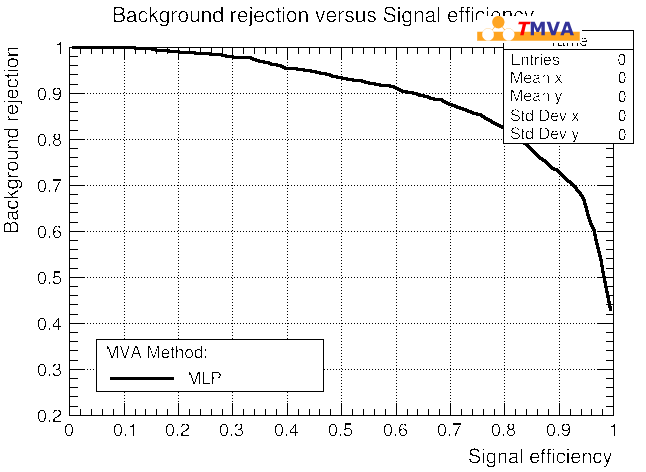

In [8]:
TFile *file=TFile::Open("TMVAOutputDL.root");

gDirectory->cd("mymc-dataset1");
TMVA::plot_efficiencies(file,  2,gDirectory);
c->Draw();
c->Draw();

In [9]:
file->cd();
gDirectory->cd("mymc-dataset2");
TMVA::plot_efficiencies(file,  2,gDirectory);

--- Found 1 classifier types
--- Found 1 instance(s) of the method Method_BDT
--- Found 1 classifier types
--- Found 1 instance(s) of the method Method_BDT


TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
TColor::TColor:0: RuntimeWarning: color 1367 already defined
Info in <TCanvas::Print>: eps file plots/rejBvsS.eps has been created


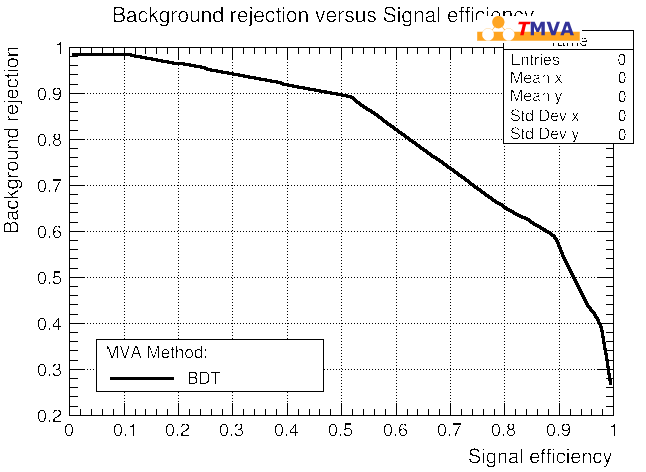

In [10]:
c->Draw();